In [1]:
%matplotlib inline
import torch
from torchdiffeq import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

import pandas as pd
import seaborn as sns
from pyPDMP.systems import System, LinearSystem, LinearStochasticSystem
from pyPDMP.models import MLP
from pyPDMP.utils import buildDataset

In [4]:
m = LinearStochasticSystem(k=2, b=2, lambd=0.9, mu_jump=0.5, std_jump=0.2, std_s=0.03)
x0 = 2*torch.rand(2)

sol = m.trajectory(x0, 10, 5000)

In [18]:
a = [torch.stack((el.view(1,2), torch.zeros(1,2)), ) for el in sol]

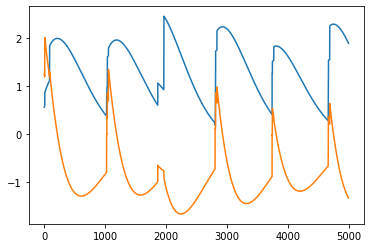

In [48]:
plt.plot(sol.numpy())

In [49]:
m.jcount

19

In [58]:
[m.log[i+1][0] - m.log[i][0] for i in range(len(m.log)-1)]

[79, 937, 4, 8, 18, 811, 99, 2, 840, 5, 3, 22, 907, 4, 23, 895, 2, 22]

# Dataset creation

In [3]:
m = LinearStochasticSystem(k=2, b=2, lambd=0.9, mu_jump=0.5, std_jump=0.2, std_s=0.03)
initials = [10*torch.rand(2) for i in range(10)]
log = buildDataset(m, initials, 10, 1000)

Starting var:.. system = <pyPDMP.systems.LinearStochasticSystem object at 0x0000021CECCD2F98>
Starting var:.. initial_conds = [tensor([9.4751, 3.3008]), tensor([9.4361, 6.821...nsor([3.4598, 8.7534]), tensor([5.7933, 3.0074])]
Starting var:.. length = 10
Starting var:.. steps = 1000
08:38:34.494782 call         8 def buildDataset(system, initial_conds, length, steps):
08:38:34.496776 line         9     dataset = []
New var:....... dataset = []
08:38:34.498772 line        10     for x0 in initial_conds:
New var:....... x0 = tensor([9.4751, 3.3008])
08:38:34.501763 line        11         sol = system.trajectory(x0, length, steps)
New var:....... sol = tensor([[ 9.4751,  3.3008],        [ 9.5069,  3....  [ 1.3521, -1.2553],        [ 1.3395, -1.2571]])
08:38:38.136547 line        12         dataset.append([torch.stack((el.view(-1), torch.zeros(0)), 1) for el in sol])
08:38:38.139539 exception   12         dataset.append([torch.stack((el.view(-1), torch.zeros(0)), 1) for el in sol])
Runtime

RuntimeError: invalid argument 0: Sizes of tensors must match except in dimension 1. Got 2 and 0 in dimension 0 at ..\aten\src\TH/generic/THTensor.cpp:711

In [3]:
net = MLP(2, 2)

In [12]:
torch.stack((torch.ones((2,1)),torch.ones(1)), 1)

RuntimeError: invalid argument 0: Tensors must have same number of dimensions: got 3 and 2 at ..\aten\src\TH/generic/THTensor.cpp:702